# Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
#len(X_train)
len(X_test)

10000

In [5]:
#X_train[0].shape
X_train.shape

(60000, 28, 28)

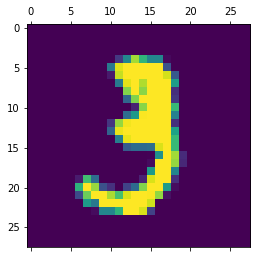

In [7]:
plt.matshow(X_train[10])

### tiền xử lý

In [8]:
#Scale values (normalize)
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

## NN không có hidden layout

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4741 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.9232


[0.2704601287841797, 0.9232000112533569]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.0539498e-02, 2.9340219e-07, 4.1382957e-02, 9.6858692e-01,
       2.0738335e-03, 8.3645590e-02, 1.4072507e-06, 9.9985421e-01,
       9.6167020e-02, 6.7788571e-01], dtype=float32)

#### test 1 image

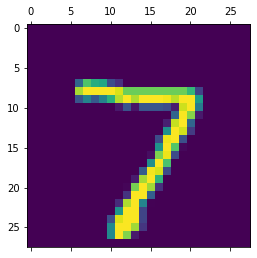

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    5,    2,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   8,   11,  896,   20,   11,    5,   13,   11,   53,    4],
       [   4,    0,   13,  927,    0,   21,    2,   11,   24,    8],
       [   1,    1,    3,    1,  910,    0,   11,    4,   10,   41],
       [  12,    2,    1,   39,   10,  757,   15,    9,   39,    8],
       [  14,    3,    6,    1,    8,   12,  909,    2,    3,    0],
       [   2,    5,   18,    9,    5,    0,    0,  954,    3,   32],
       [   6,    5,    5,   20,    9,   18,    8,   11,  885,    7],
       [  11,    7,    1,   10,   22,    5,    0,   25,    6,  922]])>

#### visualize

Text(69.0, 0.5, 'Truth')

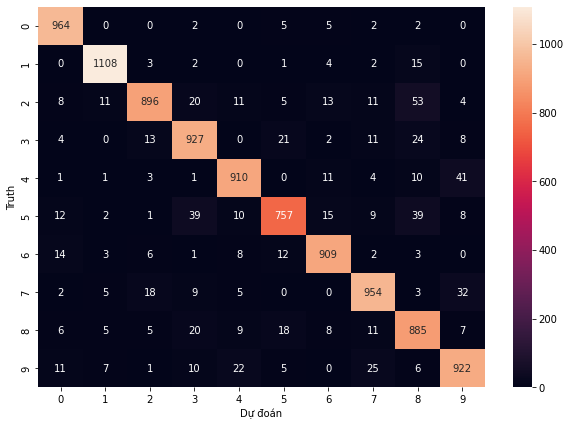

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')

## NN sử dụng hidden layout

In [23]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1201 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9846


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9758


[0.07904084026813507, 0.9757999777793884]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    3,    0,    0,    1,    4,    2,    2,    0],
       [   0, 1116,    6,    0,    0,    0,    2,    4,    7,    0],
       [   2,    0, 1017,    0,    1,    0,    2,    6,    3,    1],
       [   0,    0,   16,  952,    0,   24,    0,    6,    4,    8],
       [   1,    1,    4,    1,  952,    0,    5,    3,    1,   14],
       [   3,    0,    0,    2,    1,  878,    2,    2,    3,    1],
       [   5,    1,    1,    1,    3,    4,  941,    2,    0,    0],
       [   0,    0,   11,    1,    0,    0,    0, 1011,    0,    5],
       [   4,    0,    6,    4,    3,    2,    4,    6,  943,    2],
       [   3,    2,    0,    3,    6,    5,    2,    7,    1,  980]])>

Text(69.0, 0.5, 'Truth')

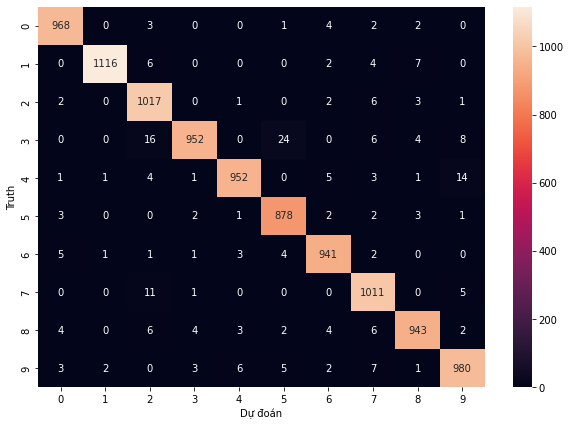

In [26]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Dự đoán')
plt.ylabel('Truth')

# KNN

In [27]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
digit = datasets.load_digits()
digit_X = digit.data # data 
digit_y = digit.target # label
print(digit_X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [29]:
digit_X.shape #(1797, 64)

(1797, 64)

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(digit_X, digit_y, test_size=360) #360 la 20% dataset

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train2, y_train2)
y_predict2 = knn.predict(X_test2)

accuracy = accuracy_score(y_predict2, y_test2)
print(accuracy)

0.9944444444444445


In [33]:
X_test2.shape #(360, 64)

(360, 64)

90


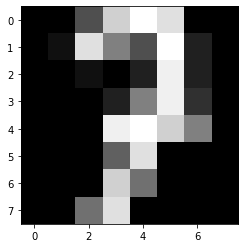

[7]


In [34]:
# Test 1 image
n = int(input())
plt.gray() 
plt.imshow(X_test2[n].reshape(8,8)) 
plt.show()
print(knn.predict(X_test2[n].reshape(1, -1)))